In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import pylab
plt.style.use('seaborn')

In [4]:
complaints_by_zipcode = pd.read_csv('df_rat_complaints_by_zipcode.csv')
complaints_by_zipcode.drop(['Unnamed: 0'], axis = 1, inplace = True)
complaints_by_zipcode.rename(columns={"incident_zip":"ZIPCODE"}, inplace=True)

In [5]:
violations_per_zip = pd.read_csv('violations_per_zip.csv')

In [6]:
df_rodents = pd.merge(violations_per_zip, complaints_by_zipcode, on='ZIPCODE')

In [7]:
df_rodents['vio_per_insp'] = df_rodents.violation_count / df_rodents.inspections

In [8]:
df_rodents_ols = df_rodents

In [9]:
df_rodents_ols.drop(['Unnamed: 0', 'inspections', 'violation_count', 'ZIPCODE'], axis=1, inplace = True)

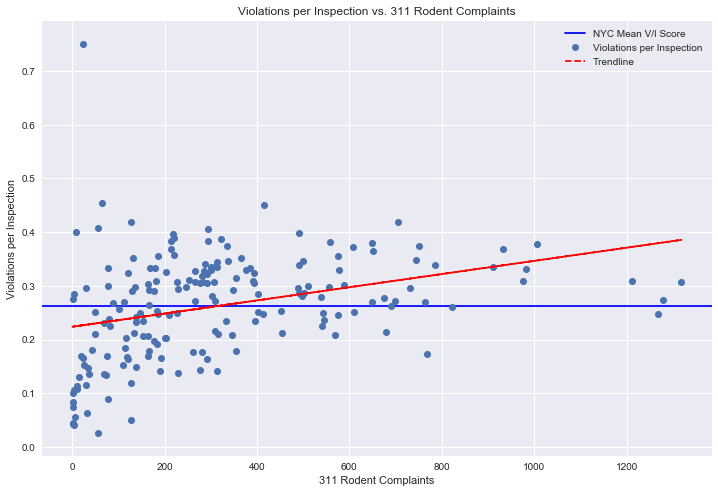

In [10]:
area = np.pi*10
y = df_rodents_ols.vio_per_insp
x = df_rodents_ols.complaints

plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=area, alpha=1)
plt.title('Violations per Inspection vs. 311 Rodent Complaints')
plt.xlabel('311 Rodent Complaints')
plt.ylabel('Violations per Inspection')

plt.axhline(df_rodents_ols.vio_per_insp.mean(), color='b')

pylab.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")

plt.legend(('NYC Mean V/I Score', 'Violations per Inspection', 'Trendline'))

plt.show()

In [11]:
formula = "vio_per_insp ~ complaints"
model = ols(formula= formula, data=df_rodents_ols).fit()

In [12]:
outcome = 'vio_per_insp'
predictors = df_rodents_ols.drop('vio_per_insp', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [13]:
model = ols(formula= formula, data=df_rodents_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vio_per_insp   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     24.12
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           2.00e-06
Time:                        16:02:54   Log-Likelihood:                 178.92
No. Observations:                 185   AIC:                            -353.8
Df Residuals:                     183   BIC:                            -347.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2239      0.010     21.520      0.000       0.203       0.244
complaints     0.0001    2.5e-05      4.911      0.000    7.34e-05       0.000
==============================================================================
Omnibus:                       45.235   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.696
Skew:                           0.874   Prob(JB):                     7.05e-39
Kurtosis:                       7.443   Cond. No.                         637.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""